1. torch: The main PyTorch library for building and training models.
2. torch.nn: Contains modules and classes for building neural networks.
3. ExponentialLR: A learning rate scheduler that decreases the learning rate by a specified factor.
4. DataLoader: A utility to load datasets in batches for training/testing.
5. datasets: Module to load standard datasets like FashionMNIST.
transforms: Utilities for transforming data (not used in this implementation).
6. ToTensor: A transform to convert images to PyTorch tensors.

In [ ]:
# Imports
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import ExponentialLR
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
from torchvision.transforms import ToTensor

#neural net imports
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

This code checks if a GPU is available and sets the device accordingly. The model will run on the GPU if available; otherwise, it will run on the CPU.

In [ ]:
# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


train_data and test_data: Loading the FashionMNIST dataset for training and testing. The dataset is transformed to tensors and downloaded if not already present.

In [ ]:
train_data = datasets. FashionMNIST(
    root = '../datasets',
    train = True,
    transform = ToTensor(),
    download = True
)
test_data = datasets. FashionMNIST(
    root = '../datasets',
    train = False,
    transform = ToTensor(),
    download = True
)

In [ ]:
print(train_data.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
print(f"Number of samples: {len(train_data)}")
print(f"Image size: {train_data[0][0].size()}")
print(f"Number of classes: {len(train_data.classes)}")

Number of samples: 60000
Image size: torch.Size([1, 28, 28])
Number of classes: 10


In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ../datasets
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [ ]:
print(test_data.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
print(f"Number of samples: {len(test_data)}")
print(f"Image size: {test_data[0][0].size()}")
print(f"Number of classes: {len(test_data.classes)}")

Number of samples: 10000
Image size: torch.Size([1, 28, 28])
Number of classes: 10


In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ../datasets
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data.data.shape

torch.Size([10000, 28, 28])

loader: This dictionary holds the DataLoader objects for the training and testing datasets, which will provide batches of data during training/testing.

In [ ]:
loader = {
    'train' : DataLoader(train_data,
                         batch_size = 50,
                         shuffle = True),

    'test' : DataLoader(test_data,
                        batch_size = 50,
                        shuffle  = True,
                        num_workers = 1)

}

CNN: This class defines the architecture of the convolutional neural network, including two convolutional layers, a dropout layer, and two fully connected layers. The forward method specifies how data passes through the network.

In [ ]:
class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10,20, kernel_size=5)
        self.drop1 = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x),2))
        x = F.relu(F.max_pool2d(self.drop1(self.conv2(x)),2))
        x = x.view(-1,320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training= self.training)
        x = self.fc2(x)

        return F.softmax(x)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetowork(nn.Module):
    def __init__(self):
        super(NeuralNetowork, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv3 = nn.Conv2d(20, 40, kernel_size=3)
        self.conv4 = nn.Conv2d(40, 80, kernel_size=1)

        # Dropout layer
        self.drop1 = nn.Dropout2d()

        # Fully connected layers
        self.fc1 = nn.Linear(80, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.drop1(self.conv2(x)), 2))
        x = F.relu(F.max_pool2d(self.conv3(x), 2))
        x = F.relu(self.conv4(x))

        x = x.view(-1, 80)  # Flatten size adjusted
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)

        return F.softmax(x, dim=1)


10 CLs, 10 MPLs, and 10 FCLs

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()

        # Convolutional and pooling layers
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv3 = nn.Conv2d(20, 40, kernel_size=3)
        self.conv4 = nn.Conv2d(40, 80, kernel_size=3)
        self.conv5 = nn.Conv2d(80, 160, kernel_size=3)
        self.conv6 = nn.Conv2d(160, 320, kernel_size=3)
        self.conv7 = nn.Conv2d(320, 640, kernel_size=3)
        self.conv8 = nn.Conv2d(640, 1280, kernel_size=3)
        self.conv9 = nn.Conv2d(1280, 2560, kernel_size=3)
        self.conv10 = nn.Conv2d(2560, 5120, kernel_size=3)

        # Dropout layer
        self.drop1 = nn.Dropout2d()

        # Fully connected layers
        self.fc1 = nn.Linear(5120, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 32)
        self.fc7 = nn.Linear(32, 16)
        self.fc8 = nn.Linear(16, 8)
        self.fc9 = nn.Linear(8, 4)
        self.fc10 = nn.Linear(4, 10)

    def forward(self, x):
        # Pass through convolutional layers with pooling
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.relu(F.max_pool2d(self.drop1(self.conv3(x)), 2))
        x = F.relu(F.max_pool2d(self.conv4(x), 2))
        x = F.relu(F.max_pool2d(self.conv5(x), 2))
        x = F.relu(F.max_pool2d(self.conv6(x), 2))
        x = F.relu(F.max_pool2d(self.conv7(x), 2))
        x = F.relu(F.max_pool2d(self.conv8(x), 2))
        x = F.relu(F.max_pool2d(self.conv9(x), 2))
        x = F.relu(F.max_pool2d(self.conv10(x), 2))

        # Flatten the tensor
        x = x.view(x.size(0), -1)

        # Pass through fully connected layers
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = F.relu(self.fc9(x))
        x = self.fc10(x)

        return F.softmax(x, dim=1)

Here, the model is initialized and transferred to the selected device (GPU or CPU). A loss function (cross-entropy loss) and an optimizer (Adam) are defined. A learning rate scheduler is also initialized.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
model = NeuralNetowork().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = ExponentialLR(optimizer, gamma=0.9)
loss_fn = nn.CrossEntropyLoss()

**train:** This function trains the model for a specified epoch. It processes batches of training data, calculates the loss, performs backpropagation, and updates model parameters.

**test:** This function evaluates the model on the test dataset, calculating the average loss and accuracy.

In [ ]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loader['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx %20 == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/ {len(loader['train'].dataset)} ({100. * batch_idx/ len(loader['train']):.0f}%)]\t{loss.item():.6f}")

def test():
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loader['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim =1, keepdim = True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loader['test'].dataset)
    print(f'\nTest Set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loader["test"].dataset)} ({100 * correct / len(loader["test"].dataset):.0f}%)\n')

The code iterates over batches in the training dataset to print the number of images in each batch.

In [ ]:
total_batches = len(loader['train'])
print(f"Total number of batches: {total_batches}")

for batch_idx, (data, target) in enumerate(loader['train']):
        data, target = data.to(device), target.to(device)

 # Print the number of images in the current batch
batch_size = data.size(0)
print(f"Batch {batch_idx + 1}/{total_batches}: Number of images = {batch_size}")

Total number of batches: 1200
Batch 1200/1200: Number of images = 50


FashionMNIST dataset for 10 epochs, achieving 81% accuracy on the test set. The process involves data loading, model definition, training, and evaluation, demonstrating the fundamental steps in building and training neural networks with PyTorch.

In [ ]:
for epoch in range(10):
    train(epoch)
    test()

Train Epoch: 0 [0/ 60000 (0%)]	2.303421
Train Epoch: 0 [1000/ 60000 (2%)]	2.300941
Train Epoch: 0 [2000/ 60000 (3%)]	2.300628
Train Epoch: 0 [3000/ 60000 (5%)]	2.222589
Train Epoch: 0 [4000/ 60000 (7%)]	2.019862
Train Epoch: 0 [5000/ 60000 (8%)]	2.090593
Train Epoch: 0 [6000/ 60000 (10%)]	2.139418
Train Epoch: 0 [7000/ 60000 (12%)]	2.100236
Train Epoch: 0 [8000/ 60000 (13%)]	1.946102
Train Epoch: 0 [9000/ 60000 (15%)]	2.013743
Train Epoch: 0 [10000/ 60000 (17%)]	1.943122
Train Epoch: 0 [11000/ 60000 (18%)]	1.973673
Train Epoch: 0 [12000/ 60000 (20%)]	1.973382
Train Epoch: 0 [13000/ 60000 (22%)]	1.867333
Train Epoch: 0 [14000/ 60000 (23%)]	1.863686
Train Epoch: 0 [15000/ 60000 (25%)]	1.979872
Train Epoch: 0 [16000/ 60000 (27%)]	1.850943
Train Epoch: 0 [17000/ 60000 (28%)]	1.963362
Train Epoch: 0 [18000/ 60000 (30%)]	1.880240
Train Epoch: 0 [19000/ 60000 (32%)]	1.917248
Train Epoch: 0 [20000/ 60000 (33%)]	1.922612
Train Epoch: 0 [21000/ 60000 (35%)]	1.981627
Train Epoch: 0 [22000/ 60000 

This function takes a list of indices and displays the corresponding images along with their predicted class names. The model is set to evaluation mode, and for each specified index, it retrieves the image, performs a prediction, and displays the result.

Prediction for index 33: Dress


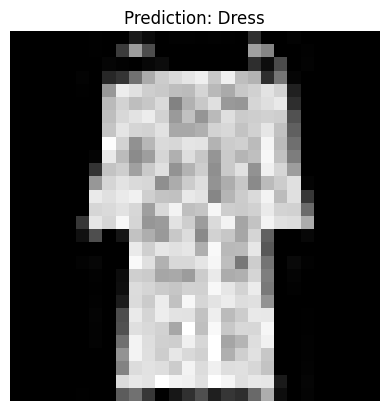

Prediction for index 78: Bag


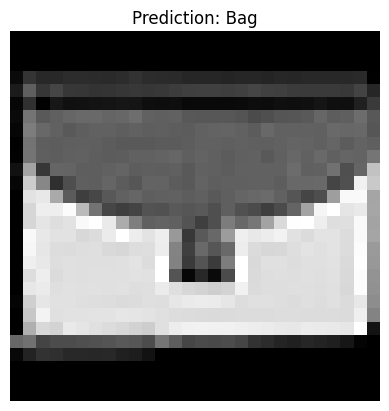

Prediction for index 66: Coat


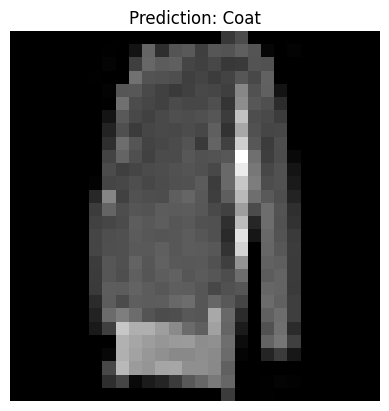

In [ ]:

class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'
]

# Function to predict and display specific images with their class names
def predict_and_show_specific_images(model, dataset, device, indices):
    model.eval()  # Set the model to evaluation mode

    for idx in indices:
        # Get the data and target for the specific index
        data, target = dataset[idx]

        # Prepare the data for the model: add batch dimension and move to the device
        data = data.unsqueeze(0).to(device)

        # Get the model's output
        output = model(data)

        # Get the predicted label
        prediction = output.argmax(dim=1, keepdim=True).item()

        # Convert the prediction to the corresponding class name
        predicted_class_name = class_names[prediction]

        print(f"Prediction for index {idx}: {predicted_class_name}")

        # Convert the image data back to a format suitable for plotting
        image = data.squeeze(0).cpu().numpy().reshape(28, 28)  # Reshape back to 28x28

        # Display the image with the predicted class name
        plt.imshow(image, cmap='gray')
        plt.title(f"Prediction: {predicted_class_name}")
        plt.axis('off')  # Hide axes for a cleaner look
        plt.show()

# Indices of the images you want to display
indices = [33, 78, 66]

# Call the function to display specific images with class names
predict_and_show_specific_images(model, test_data, device, indices)